<a href="https://colab.research.google.com/github/Nahid180/ColabNoteBook/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight=0.7
bias=0.3

start=0
step=0.02
end=1

X=torch.arange(start, end, step).unsqueeze(1)
Y=weight*X + bias

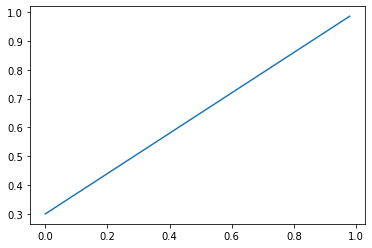

In [ ]:
plt.plot(X, Y)

In [ ]:
data_count= int(len(X)*0.8)
X_train, Y_train = X[: data_count] , Y[: data_count] 
X_test, Y_test = X[len(X_train):] , Y[len(Y_train):] 

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
len(X_test)

10

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1 , requires_grad=True, dtype=torch.float32))
    self.bias=nn.Parameter(torch.randn(1 , requires_grad=True, dtype=torch.float32))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
torch.manual_seed(42)

model_0=LinearModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

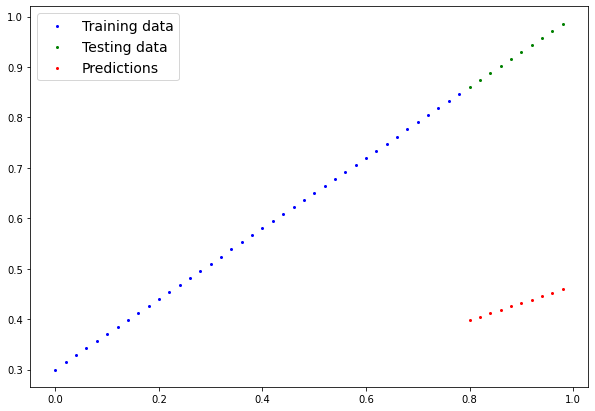

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
loss_function=nn.L1Loss()
optimizer=torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs=100

for epoch in range(epochs):
  model_0.train()

  y_pred= model_0(X_train)

  loss=loss_function(y_pred, Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()


  with torch.inference_mode():
    test_pred=model_0(X_test)

    test_loss=loss_function(test_pred, Y_test)

    print(f"Epoch: {epoch} | Test_loss: {test_loss} | Loss: {loss}")

  

Epoch: 0 | Test_loss: 0.47563618421554565 | Loss: 0.31288138031959534
Epoch: 1 | Test_loss: 0.45673617720603943 | Loss: 0.29898133873939514
Epoch: 2 | Test_loss: 0.4378361701965332 | Loss: 0.28508132696151733
Epoch: 3 | Test_loss: 0.418936163187027 | Loss: 0.2711813449859619
Epoch: 4 | Test_loss: 0.40003615617752075 | Loss: 0.2572813332080841
Epoch: 5 | Test_loss: 0.3811361789703369 | Loss: 0.2433813512325287
Epoch: 6 | Test_loss: 0.3622361719608307 | Loss: 0.22948133945465088
Epoch: 7 | Test_loss: 0.34333616495132446 | Loss: 0.21558134257793427
Epoch: 8 | Test_loss: 0.324436217546463 | Loss: 0.20168134570121765
Epoch: 9 | Test_loss: 0.3055362403392792 | Loss: 0.18778134882450104
Epoch: 10 | Test_loss: 0.2866361737251282 | Loss: 0.17388132214546204
Epoch: 11 | Test_loss: 0.2677362263202667 | Loss: 0.15998134016990662
Epoch: 12 | Test_loss: 0.2488362044095993 | Loss: 0.1460813283920288
Epoch: 13 | Test_loss: 0.22993624210357666 | Loss: 0.1321813315153122
Epoch: 14 | Test_loss: 0.2110362

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7037])), ('bias', tensor([0.3006]))])

In [ ]:
with torch.inference_mode():
  y_pred_new=model_0(X_test)

In [ ]:
y_pred_new

tensor([[0.8635],
        [0.8776],
        [0.8917],
        [0.9057],
        [0.9198],
        [0.9339],
        [0.9480],
        [0.9620],
        [0.9761],
        [0.9902]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

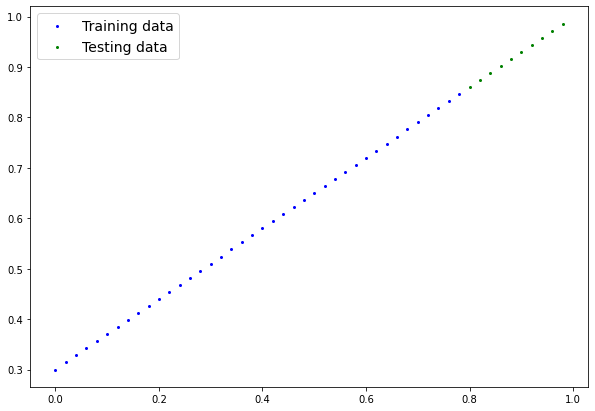

In [ ]:
plot_predictions()

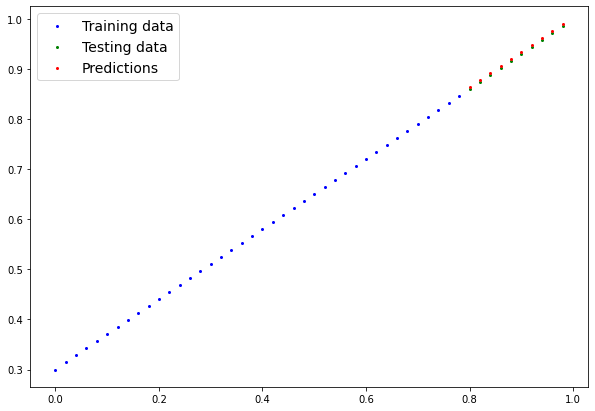

In [ ]:
plot_predictions(predictions=y_pred_new)

In [ ]:
from pathlib import Path

model_path=Path('model', )
model_path.mkdir(parents=True, exist_ok=True)
model_name='linear_model.pt'

SAVE_PATH=model_path/model_name
SAVE_PATH

PosixPath('model/linear_model.pt')

In [ ]:
torch.save(obj=model_0.state_dict(), f=SAVE_PATH)

In [ ]:
loaded_model=LinearModel()
loaded_model.load_state_dict(torch.load(f=SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7037])), ('bias', tensor([0.3006]))])

##Putting it all togeteher

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
weight=0.9
bias=0.1

x=torch.arange(0, 1, 0.001).unsqueeze(dim=1)


In [ ]:
x.shape

torch.Size([1000, 1])

In [ ]:
y=weight*x + bias

In [ ]:
splitter=int(len(x)*0.8)

x_train, y_train = x[: splitter], y[: splitter]

x_test, y_test = x[len(x_train):] , y[len(x_train):]

In [ ]:
def visualize(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, prediction=None):
  plt.figure(figsize=(10, 7))

  plt.plot(x_train, y_train, linestyle='dashed' ,label='Train')

  plt.plot(x_test, y_test ,linestyle='dashed' ,label='Test')

  if prediction is not None:
    plt.plot(x_test, prediction ,linestyle='dashed' ,label='Prediction')

  plt.legend(prop={"size": 14})

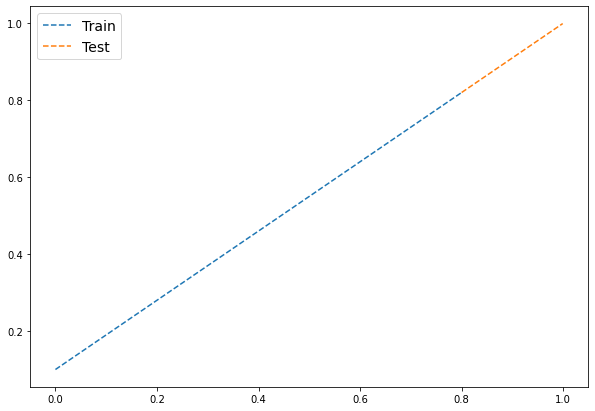

In [ ]:
visualize()

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.tensor)->torch.tensor:
    return self.linear(x)

In [ ]:
torch.manual_seed(42)
model_1=LinearRegression()

model_1.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784],
                      [-0.0815,  0.4451,  0.0853],
                      [-0.2695,  0.1472, -0.2660],
                      [-0.0677, -0.2345,  0.3830],
                      [-0.4557, -0.2662, -0.1630],
                      [-0.3471,  0.0545, -0.5702]])),
             ('linear.bias',
              tensor([ 0.5214, -0.4904,  0.4457,  0.0961, -0.1875,  0.3568,  0.0900,  0.4665,
                       0.0631, -0.1821]))])

In [ ]:
device='cuda'
model_1.to(device)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

In [ ]:
def train(epochs, x_train, y_train, x_test, y_test):
  epoch_list=[]
  loss_list=[]
  test_loss_list=[]

  optimizer=torch.optim.Adam(model_1.parameters(), lr=0.01)
  loss_func=nn.L1Loss()

  for epoch in range(epochs):

    model_1.train()

    y_pred=model_1(x_train)
    
    loss=loss_func(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    epoch_list.append(epoch)
    loss_list.append(loss)

    with torch.inference_mode():
      test_pred=model_1(x_test)
      test_loss=loss_func(test_pred ,y_test)
    test_loss_list.append(test_loss)

    print(f"Epoch: {epoch} | Test_loss: {test_loss} | Loss: {loss}")

  return epoch_list, loss_list, test_loss_list

In [ ]:
history=train(300,x_train, y_train, x_test, y_test)

Epoch: 0 | Test_loss: 0.5891653299331665 | Loss: 0.675891101360321
Epoch: 1 | Test_loss: 0.5701703429222107 | Loss: 0.6618960499763489
Epoch: 2 | Test_loss: 0.5511753559112549 | Loss: 0.6479010581970215
Epoch: 3 | Test_loss: 0.5321803689002991 | Loss: 0.6339060664176941
Epoch: 4 | Test_loss: 0.5131853818893433 | Loss: 0.6199110746383667
Epoch: 5 | Test_loss: 0.49419042468070984 | Loss: 0.6059161424636841
Epoch: 6 | Test_loss: 0.4751954674720764 | Loss: 0.5919210910797119
Epoch: 7 | Test_loss: 0.4562004804611206 | Loss: 0.5779260993003845
Epoch: 8 | Test_loss: 0.4372054636478424 | Loss: 0.5639311671257019
Epoch: 9 | Test_loss: 0.4182104766368866 | Loss: 0.5499361753463745
Epoch: 10 | Test_loss: 0.3992154896259308 | Loss: 0.5359411239624023
Epoch: 11 | Test_loss: 0.38022053241729736 | Loss: 0.5219461917877197
Epoch: 12 | Test_loss: 0.36122554540634155 | Loss: 0.5079512000083923
Epoch: 13 | Test_loss: 0.34223055839538574 | Loss: 0.49395620822906494
Epoch: 14 | Test_loss: 0.323235541582107

In [ ]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.9008]], device='cuda:0')),
             ('linear.bias', tensor([0.1001], device='cuda:0'))])

In [ ]:
weight, bias

(0.9, 0.1)

In [ ]:
with torch.inference_mode():
  y_pred_new=model_1(x_test)

In [ ]:
y_pred_new=y_pred_new.to('cpu')

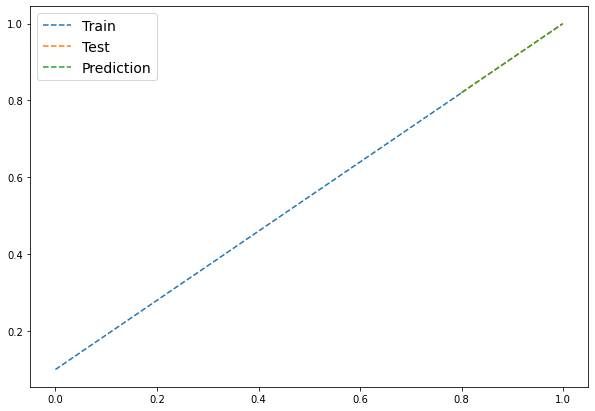

In [ ]:
visualize(prediction=y_pred_new)

In [ ]:
save=torch.save(obj=model_1, f="/content/model/self.pt")

In [ ]:
load=torch.load(f="/content/model/self.pt")

In [ ]:
load.state_dict()

OrderedDict([('linear.weight', tensor([[0.9008]], device='cuda:0')),
             ('linear.bias', tensor([0.1001], device='cuda:0'))])